<h1>Универсальный шаблон (под любой регион РФ)<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Используемые-ресурсы" data-toc-modified-id="Используемые-ресурсы-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Используемые ресурсы</a></span></li><li><span><a href="#Формирование-генеральной-совокупности" data-toc-modified-id="Формирование-генеральной-совокупности-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Формирование генеральной совокупности</a></span></li><li><span><a href="#Подготовка-обучающего-и-тестового-фрейма-и-оценка-ценности-признаков" data-toc-modified-id="Подготовка-обучающего-и-тестового-фрейма-и-оценка-ценности-признаков-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка обучающего и тестового фрейма и оценка ценности признаков</a></span></li><li><span><a href="#Классификация-деревьями" data-toc-modified-id="Классификация-деревьями-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Классификация деревьями</a></span></li><li><span><a href="#Классификация-бустингом" data-toc-modified-id="Классификация-бустингом-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Классификация бустингом</a></span><ul class="toc-item"><li><span><a href="#Scikit" data-toc-modified-id="Scikit-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Scikit</a></span></li><li><span><a href="#XGboost" data-toc-modified-id="XGboost-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>XGboost</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#AdaBoost" data-toc-modified-id="AdaBoost-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>AdaBoost</a></span></li></ul></li><li><span><a href="#Классификация-методом-опорных-векторов" data-toc-modified-id="Классификация-методом-опорных-векторов-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Классификация методом опорных векторов</a></span></li><li><span><a href="#Ансамбль-методов" data-toc-modified-id="Ансамбль-методов-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Ансамбль методов</a></span><ul class="toc-item"><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Bagging" data-toc-modified-id="Bagging-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Bagging</a></span><ul class="toc-item"><li><span><a href="#Bagging-(DecisionTreeClassifier)" data-toc-modified-id="Bagging-(DecisionTreeClassifier)-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>Bagging (DecisionTreeClassifier)</a></span></li><li><span><a href="#Bagging-(Support-Vector-Method)" data-toc-modified-id="Bagging-(Support-Vector-Method)-7.2.2"><span class="toc-item-num">7.2.2&nbsp;&nbsp;</span>Bagging (Support Vector Method)</a></span><ul class="toc-item"><li><span><a href="#Дефолтные-гиперпараметры" data-toc-modified-id="Дефолтные-гиперпараметры-7.2.2.1"><span class="toc-item-num">7.2.2.1&nbsp;&nbsp;</span>Дефолтные гиперпараметры</a></span></li><li><span><a href="#Гиперпараметры-из-п.-5" data-toc-modified-id="Гиперпараметры-из-п.-5-7.2.2.2"><span class="toc-item-num">7.2.2.2&nbsp;&nbsp;</span>Гиперпараметры из п. 5</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Метод-K-ближайших-соседей" data-toc-modified-id="Метод-K-ближайших-соседей-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Метод K-ближайших соседей</a></span></li></ul></div>

**Исследуемый субъект**: (*для примера – Республика Татарстан*). Генеральная совокупность: 2013-2023 год, тестовая выборка: 2023 год

# Используемые ресурсы 

In [1]:
import os
import shutil
import requests
import datetime
import warnings
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.fixes import loguniform
from catboost import CatBoostClassifier
import xgboost as xgb

# Формирование генеральной совокупности

In [2]:
headers = {
    'Accept': '*/*',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36'
}


t = {'ё': 'yo', 'а': 'a', 'б': 'b', 'в': 'v', 'г': 'g', 'д': 'd', 'е': 'e', 'ж': 'zh',
     'з': 'z', 'и': 'i', 'й': 'y', 'к': 'k', 'л': 'l', 'м': 'm', 'н': 'n', 'о': 'o', 'п': 'p',
     'р': 'r', 'с': 's', 'т': 't', 'у': 'u', 'ф': 'f', 'х': 'h', 'ц': 'c', 'ч': 'ch', 'ш': 'sh',
     'щ': 'shch', 'ъ': '', 'ы': 'y', 'ь': '', 'э': 'e', 'ю': 'yu', 'я': 'ya'}
def translate(text: str, sep = '_'):
    tx = ''
    for i in text:
        if i == '"' or i == '|':
            tx += ''
        elif i != ' ':
            tx += t.get(i, i)
        else:
            tx += sep
    return tx

valid_data = {}
with open('index.html', 'r', encoding='utf-8') as file:
    src = file.read() 

soup = BeautifulSoup(src, 'lxml')

divs_anch = soup.find_all('div', class_="xml-data-row-links")
divs = soup.find_all('div', class_='header')

anch = [divs_anch[i].find_all('a') for i in range(len(divs))]


for i in range(len(divs)):
    for j in range(len(anch[i])):
        valid_data[divs[i].text + ' | ' + anch[i][j].text] = anch[i][j].get('href')[anch[i][j].get('href').find('_', 55)+1:anch[i][j].get('href').rfind('_')]

def get_data():
    key = input('\n'.join(valid_data.keys()) + '\n')
    tr_key = translate(key.lower())
    print(tr_key)
    if not os.path.exists(f'./{tr_key.capitalize()}'):
        os.mkdir(f'./{tr_key.capitalize()}')
    for i in range(2013, 2024):
        for j in range(1, 13):
            req = requests.get(
                url = f'https://www.atsenergo.ru/dload/calcfacthour_regions/{i}{j:02}_{valid_data[key]}_calcfacthour.xls',
                headers=headers,
                verify=False
                )
            if req.status_code == 404:
                continue
            try:
                if not os.path.exists(f'./{tr_key.capitalize()}/{tr_key}_{i}_{j:02}__{valid_data[key]}.xls'):
                    with open(f'./{tr_key.capitalize()}/{tr_key}_{i}_{j:02}__{valid_data[key]}.xls', 'wb') as file:
                        file.write(req.content)
            except Exception as ex:
                print(ex)
    return transformation_data(tr_key)

def transformation_data(key):
    for adress, dirs, files in os.walk(f'./{key.capitalize()}'):
        for name in files:
            url = os.path.join(adress, name)
            df= pd.read_excel(url, index_col=False).iloc[7:]
            df.columns = ['Date', 'Hour']
            df = df.reset_index(drop=True)
            df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')
            for i, j in enumerate(['Year', 'Month', 'Day']):
                if j == 'Year':
                    df.insert(i, j, df['Date'].dt.year)
                elif j == 'Month':
                    df.insert(i, j, df['Date'].dt.month)
                else:
                    df.insert(i, j, df['Date'].dt.day)
            df = df.drop(columns='Date')
            df.to_excel(url+'x', index=False)
            os.remove(url)
    return result_dataframe(key)
            
def result_dataframe(key):
    files_url = []
    result = pd.DataFrame()
    for adress, dirs, files in os.walk(f'./{key.capitalize()}'):
        for name in files:
            files_url.append(os.path.join(adress, name))
    for file in files_url:
        df = pd.read_excel(file, index_col=False)
        result = result._append(df)
    shutil.rmtree(f'./{key.capitalize()}')
    return result

In [3]:
warnings.filterwarnings('ignore') # супрессим предупреждения https

df_general = get_data()

warnings.filterwarnings("default") # возвращаем предупреждения к дефолтным настройкам

Алтайский край | АО "Алтайэнергосбыт"
Алтайский край | АО "Алтайкрайэнерго"
Алтайский край | АО "Барнаульская горэлектросеть"
Алтайский край | ООО "Заринская горэлектросеть"
Амурская область | ПАО "ДЭК"
Архангельская область | ООО "ТГК-2 Энергосбыт"
Астраханская область | ПАО "Астраханская энергосбытовая компания"
Астраханская область | ООО "РУСЭНЕРГОСБЫТ"
Белгородская область | АО "Белгородэнергосбыт"
Брянская область | ООО "Газпром энергосбыт Брянск"
Владимирская область | ООО "ЭСВ"
Владимирская область | ООО "РУСЭНЕРГОСБЫТ"
Владимирская область | АО "ЭнергосбыТ Плюс"
Волгоградская область | ООО "РУСЭНЕРГОСБЫТ"
Волгоградская область | ПАО "Волгоградэнергосбыт"
Вологодская область | ООО "ССК"
Воронежская область | ООО "БЭСО"
Воронежская область | ПАО "ТНС энерго Воронеж"
Город Севастополь | ООО "СЕВЭНЕРГОСБЫТ"
Еврейская автономная область | ПАО "ДЭК"
Забайкальский край | АО "Читаэнергосбыт"
Ивановская область | ООО "Ивановоэнергосбыт"
Ивановская область | АО "ЭнергосбыТ Плюс"
Иркутска

In [4]:
df_general

,Year,Month,Day,Hour
0,2013,1,9,18
1,2013,1,10,18
2,2013,1,11,10
3,2013,1,14,10
4,2013,1,15,10
...,...,...,...,...
16,2023,12,25,16
17,2023,12,26,10
18,2023,12,27,17
19,2023,12,28,17


# Подготовка обучающего и тестового фрейма и оценка ценности признаков

In [5]:
# формируем генеральную совокупность
df_general = df_general.drop_duplicates(subset=['Year', 'Month', 'Day'])

# формируем обучающий датафрейм
df_train = df_general[df_general['Year'] < 2023]
df_train.reset_index(drop=True, inplace=True)

# формируем тестовую выборку
df_test = df_general[df_general['Year'] == 2023]
df_test.reset_index(drop=True, inplace=True)

# формируем исследуемый список датасетов
date_list = list([['Year', 'Month', 'Day'], 
                  ['Year', 'Day'], 
                  ['Month', 'Day'], 
                  ['Year', 'Month']])

predicted_list = list(['Predicted', 
                       'Predicted_YD', 
                       'Predicted_MD', 
                       'Predicted_YM'])

message_list = list(['full set', 
                     'year + day', 
                     'month + day',
                     'year + month'])

# указываем способы нормирования данных
scaler_list = list([StandardScaler(), MinMaxScaler()])

# группируем результаты в итоговую таблицу
df_final = pd.DataFrame({'method':[], 
                         'set':[], 
                         'scaler':[], 
                         'depth':[], 
                         'accuracy':[]})

In [6]:
df_general.info()  # пропуски в данных отсутствуют

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2701 entries, 0 to 20
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    2701 non-null   int64
 1   Month   2701 non-null   int64
 2   Day     2701 non-null   int64
 3   Hour    2701 non-null   int64
dtypes: int64(4)
memory usage: 105.5 KB


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454 entries, 0 to 2453
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    2454 non-null   int64
 1   Month   2454 non-null   int64
 2   Day     2454 non-null   int64
 3   Hour    2454 non-null   int64
dtypes: int64(4)
memory usage: 76.8 KB


In [8]:
df_train  # обучающая выборка

,Year,Month,Day,Hour
0,2013,1,9,18
1,2013,1,10,18
2,2013,1,11,10
3,2013,1,14,10
4,2013,1,15,10
...,...,...,...,...
2449,2022,12,26,17
2450,2022,12,27,17
2451,2022,12,28,11
2452,2022,12,29,17


In [9]:
df_test  # тестовая выборка

,Year,Month,Day,Hour
0,2023,1,9,17
1,2023,1,10,17
2,2023,1,11,11
3,2023,1,12,10
4,2023,1,13,10
...,...,...,...,...
242,2023,12,25,16
243,2023,12,26,10
244,2023,12,27,17
245,2023,12,28,17


In [10]:
# список всех возможных часов в датафрейме
hours_list = [str(num) for num in list(set(df_general.Hour.values))]

# словарь (dict) из пиковых часов и их порядковых номеров
hours_dict = {int(hours_list[i]): i for i in range(len(hours_list))}

# распределение часов в обучающем датафрейме за весь период
df_general.Hour.value_counts()

10    916
11    661
17    343
14    287
18    189
19     65
20     61
15     50
16     44
21     40
13     22
9      19
12      4
Name: Hour, dtype: int64

<AxesSubplot: xlabel='Hour', ylabel='Count'>

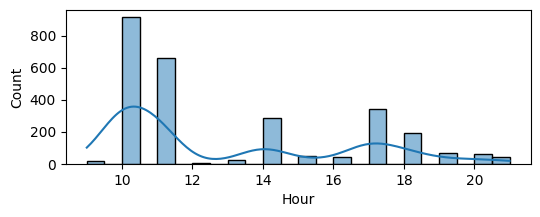

In [11]:
plt.figure(figsize=(6,2))
sns.histplot(data=df_general, x = 'Hour', bins = 24, kde = True)

**Вывод**: исходные данные стабильны. Распределение пиковых часов приближено к *распределению Гаусса-Лапласса*

In [12]:
# классифицируем ценность признаков
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=10)
result = selector.fit(df_general[['Year', 'Month', 'Day']], df_general['Hour'])
features_table = pd.DataFrame(result.feature_importances_, index = ['Year', 'Month', 'Day'], columns = ['importance'])
features_table.sort_values(by='importance', ascending=False)

,importance
Day,0.432771
Month,0.375436
Year,0.191793


**Вывод:** наибольшей ценностью, с точки зрения классификации пикового часа, обладают день и месяц предсказания. Наименьшей ценностью обладает год. Что вполне логично и предсказуемо

In [13]:
# оценим корреляцию значений в обучающей выборке
cm = sns.color_palette("vlag", as_cmap=True)

df_general.corr('pearson').style.background_gradient(cmap=cm, vmin = -1, vmax=1)

,Year,Month,Day,Hour
Year,1.000000,0.002457,-0.003241,-0.032805
Month,0.002457,1.000000,-0.042408,0.329119
Day,-0.003241,-0.042408,1.000000,-0.017544
Hour,-0.032805,0.329119,-0.017544,1.000000


**Вывод:** Отсутствует какая либо существенная корреляционная связь между значением пикового часа и каким-либо параметром (днём, месяцем или годом)

<Figure size 5000x5000 with 0 Axes>

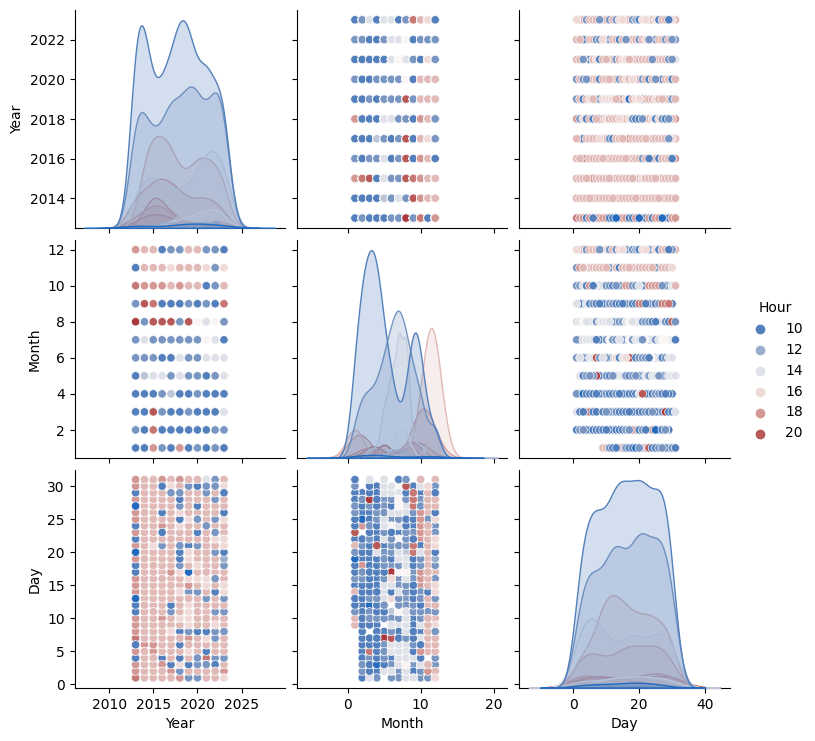

In [14]:
plt.figure(figsize=(50,50))
sns.pairplot(df_general, hue = 'Hour', palette = "vlag")
#plt.savefig('pairplot.png', dpi = 300, transparent = True)

**Вывод**: графики взаимосвязи исследуемых признаков говорят о классической задачи классификации

# Классификация деревьями

In [15]:
df_tree_train = df_train.copy()  # формируем обучающий датафрейм
df_tree_test = df_test.copy()  # формируем тестовый датафрейм

for date in range(len(date_list)):
    
    # инициализируем итоговый датафрейм с метриками качества при различных гиперпараметрах модели
    df_result = pd.DataFrame({'accuracy':[]})
    
    for i in range(2, 100):    
        model = tree.DecisionTreeClassifier(max_depth=i)  # обучаем модель
        model.fit(df_tree_train[date_list[date]], y=df_tree_train['Hour'])

        # предсказываем пиковый час
        df_tree_test[predicted_list[date]] = model.predict(df_tree_test[date_list[date]])
        
        # заполняем итоговый датафрейм долей верно классифицированных часов
        df_result.loc[i] = [accuracy_score(df_tree_test[predicted_list[date]], df_tree_test['Hour'])]
    
    print(message_list[date], f"{df_result.accuracy.max():.2%}", 'при глубине:', df_result.accuracy.idxmax())

    df_final = pd.concat([df_final, pd.DataFrame([{'method': 'DTC', 
                                                  'set': message_list[date],
                                                  'scaler': 'None', 
                                                  'depth': df_result.accuracy.idxmax(),
                                                  'accuracy': df_result.accuracy.max()}])], ignore_index=True)

full set 46.56% при глубине: 6
year + day 30.36% при глубине: 2
month + day 47.37% при глубине: 6
year + month 46.96% при глубине: 7


[Text(0.5, 0.8333333333333334, 'Month <= 10.5\ngini = 0.79\nsamples = 2454\nvalue = [17, 841, 594, 3, 22, 244, 44, 35, 317, 181, 60\n57, 39]\nclass = 10'),
 Text(0.25, 0.5, 'Month <= 4.5\ngini = 0.748\nsamples = 2031\nvalue = [12, 799, 556, 3, 22, 244, 44, 4, 61, 134, 56, 57\n39]\nclass = 10'),
 Text(0.125, 0.16666666666666666, 'gini = 0.627\nsamples = 765\nvalue = [8, 437, 141, 1, 3, 11, 1, 0, 54, 59, 24, 23, 3]\nclass = 10'),
 Text(0.375, 0.16666666666666666, 'gini = 0.77\nsamples = 1266\nvalue = [4, 362, 415, 2, 19, 233, 43, 4, 7, 75, 32, 34\n36]\nclass = 11'),
 Text(0.75, 0.5, 'Year <= 2013.5\ngini = 0.598\nsamples = 423\nvalue = [5, 42, 38, 0, 0, 0, 0, 31, 256, 47, 4, 0, 0]\nclass = 17'),
 Text(0.625, 0.16666666666666666, 'gini = 0.613\nsamples = 42\nvalue = [4, 11, 0, 0, 0, 0, 0, 0, 0, 23, 4, 0, 0]\nclass = 18'),
 Text(0.875, 0.16666666666666666, 'gini = 0.521\nsamples = 381\nvalue = [1, 31, 38, 0, 0, 0, 0, 31, 256, 24, 0, 0, 0]\nclass = 17')]

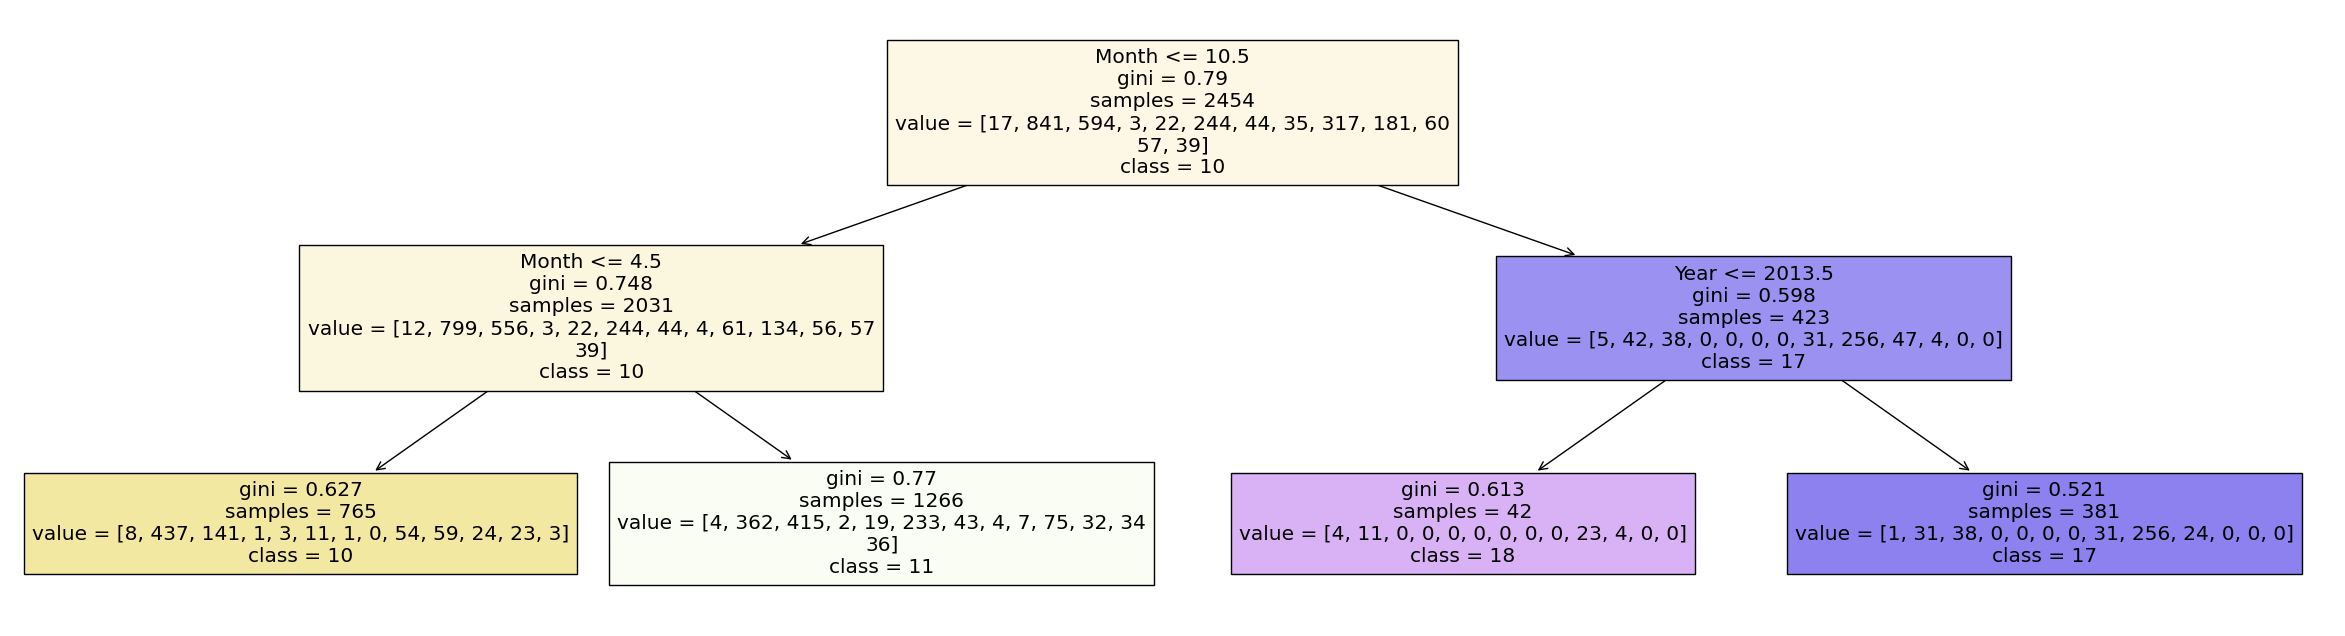

In [16]:
# Визуализируем дерево решений
model = tree.DecisionTreeClassifier(max_depth=2)
model.fit(df_tree_train[date_list[0]], y=df_tree_train['Hour'].values)

plt.style.use('default')
plt.figure(figsize=(30,8))

tree.plot_tree(model, 
               class_names=hours_list,
               feature_names=['Year', 'Month', 'Day'], filled=True)
#plt.savefig('tree.png', dpi = 400, transparent = True)

# Классификация бустингом

## Scikit

In [17]:
df_boost_train = df_train.copy()  # формируем обучающий датафрейм
df_boost_test = df_test.copy()  # формируем тестовый датафрейм

model = GradientBoostingClassifier()

for date in range(len(date_list)):    
    
    # обучаем модель
    model.fit(df_boost_train[date_list[date]], y = df_boost_train['Hour'])
    
    # Предсказываем пиковый час
    df_boost_test[predicted_list[date]] = model.predict(df_boost_test[date_list[date]])

    # процент правильно классифицированных объектов
    print(message_list[date], f"{accuracy_score(df_boost_test[predicted_list[date]], df_boost_test['Hour']):.2%}")
    
    df_final = pd.concat([df_final, pd.DataFrame([{'method': 'GradientBoosting', 
                                                  'set': message_list[date],
                                                  'scaler': 'None', 
                                                  'depth': 'None',
                                                  'accuracy': accuracy_score(df_boost_test[predicted_list[date]], df_boost_test['Hour'])}])], ignore_index=True)

full set 42.91%
year + day 25.51%
month + day 46.56%
year + month 44.94%


## XGboost

In [18]:
df_boost_train = df_train.copy()  # формируем обучающий датафрейм
df_boost_test = df_test.copy()  # формируем тестовый датафрейм

# переводим числовые признаки в категориальные
df_boost_train = df_boost_train.replace(
    {'Hour':{i:hours_dict[i] for i in df_boost_train['Hour']}})

model = xgb.XGBClassifier()

for date in range(len(date_list)):
    
    # обучаем модель
    model.fit(df_boost_train[date_list[date]], y = df_boost_train['Hour'])

    # Предсказываем пиковый час
    df_boost_test[predicted_list[date]] = model.predict(df_boost_test[date_list[date]])

    # Возвращаем категориальные признаки в числовые
    df_boost_test = df_boost_test.replace(
        {predicted_list[date]:{i:int(hours_list[i]) for i in df_boost_test[predicted_list[date]]}})

    # процент правильно классифицированных объектов
    print(message_list[date], f"{accuracy_score(df_boost_test[predicted_list[date]], df_boost_test['Hour']):.2%}")
    
    df_final = pd.concat([df_final, pd.DataFrame([{'method': 'XGBoost', 
                                                  'set': message_list[date],
                                                  'scaler': 'None', 
                                                  'depth': 'None',
                                                  'accuracy': accuracy_score(df_boost_test[predicted_list[date]], df_boost_test['Hour'])}])], ignore_index=True)


full set 34.41%
year + day 25.10%
month + day 41.30%
year + month 42.51%


## CatBoost

In [19]:
df_boost_train = df_train.copy()  # формируем обучающий датафрейм
df_boost_test = df_test.copy()  # формируем тестовый датафрейм

model = CatBoostClassifier(silent=True)

for date in range(len(date_list)):    
    
    # обучаем модель
    model.fit(df_boost_train[date_list[date]], y = df_boost_train['Hour'])
    
    # Предсказываем пиковый час
    df_boost_test[predicted_list[date]] = model.predict(df_boost_test[date_list[date]])
    
    # процент правильно классифицированных объектов
    print(message_list[date], f"{accuracy_score(df_boost_test[predicted_list[date]], df_boost_test['Hour']):.2%}")
    
    df_final = pd.concat([df_final, pd.DataFrame([{'method': 'CatBoost', 
                                                  'set': message_list[date],
                                                  'scaler': 'None', 
                                                  'depth': 'None',
                                                  'accuracy': accuracy_score(df_boost_test[predicted_list[date]], df_boost_test['Hour'])}])], ignore_index=True)

full set 38.87%
year + day 25.51%
month + day 44.94%
year + month 42.51%


## AdaBoost

In [20]:
df_boost_train = df_train.copy()  # формируем обучающий датафрейм
df_boost_test = df_test.copy()  # формируем тестовый датафрейм

model = AdaBoostClassifier()

for date in range(len(date_list)):    
    
    # обучаем модель
    model.fit(df_boost_train[date_list[date]], y = df_boost_train['Hour'])
    
    # Предсказываем пиковый час
    df_boost_test[predicted_list[date]] = model.predict(df_boost_test[date_list[date]])
    
    # процент правильно классифицированных объектов
    print(message_list[date], f"{accuracy_score(df_boost_test[predicted_list[date]], df_boost_test['Hour']):.2%}")
    
    df_final = pd.concat([df_final, pd.DataFrame([{'method': 'AdaBoost', 
                                                  'set': message_list[date],
                                                  'scaler': 'None', 
                                                  'depth': 'None',
                                                  'accuracy': accuracy_score(df_boost_test[predicted_list[date]], df_boost_test['Hour'])}])], ignore_index=True)

full set 29.15%
year + day 29.15%
month + day 29.15%
year + month 29.15%


# Классификация методом опорных векторов

In [21]:
df_SVC_train = df_train.copy()  # формируем обучающий датафрейм
df_SVC_test = df_test.copy()  # формируем тестовый датафрейм
df_SVC_gen = pd.concat([df_SVC_train, df_SVC_test])  # формируем генеральную совокупность

# нормировка данных перед их использованием
scaler = MinMaxScaler()
scaler.fit(df_SVC_gen[date_list[0]])
arr_gen = scaler.transform(df_SVC_gen[date_list[0]])
arr_test = scaler.transform(df_SVC_test[date_list[0]])

# поиск лучших гиперпараметров SVC с помощью рандомизированного поиска
C_range = loguniform(1e-2, 1e2) 
gamma_range = loguniform(1e-2, 1e0)
tuned_parameters = [{'kernel': ['rbf'], 'gamma': gamma_range, 'C': C_range},
                    {'kernel': ['linear'], 'gamma': gamma_range, 'C': C_range}]

n_iter_search = 100
SVС_search = RandomizedSearchCV(estimator = SVC(coef0=0.5), verbose=0,
                          param_distributions=tuned_parameters,
                          cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42), 
                          n_iter = n_iter_search, random_state=42)

SVС_search.fit(arr_gen, df_SVC_gen['Hour'].values)

SVCbest = SVС_search.best_estimator_

SVCbest.fit(arr_gen, df_SVC_gen['Hour'].values);

# Предсказываем пиковый час
df_SVC_test['Predicted'] = SVCbest.predict(arr_test)

# процент правильно классифицированных объектов
print('Точность прогноза:', f"{accuracy_score(df_SVC_test['Predicted'], df_SVC_test['Hour']):.2%}")

df_final = pd.concat([df_final, pd.DataFrame([{'method': 'SVC', 
                                                  'set': message_list[0],
                                                  'scaler': 'MinMaxScaler', 
                                                  'depth': 'None',
                                                  'accuracy': accuracy_score(df_SVC_test['Predicted'], df_SVC_test['Hour'])}])], ignore_index=True)

Точность прогноза: 44.94%


In [22]:
SVC_gp = SVCbest.get_params() #  передача оптимальных гиперпараметров модели в объект типа Dict
SVCbest

SVC(C=77.06343825607371, coef0=0.5, gamma=0.4986865424754635)

# Ансамбль методов

## Random Forest

In [23]:
df_ensemble_train = df_train.copy()  # формируем обучающий датафрейм
df_ensemble_test = df_test.copy()  # формируем тестовый датафрейм

for date in range(len(date_list)):
    
    # инициализируем итоговый датафрейм с метриками качества при различных гиперпараметрах модели
    df_result = pd.DataFrame({'accuracy':[]})
    
    for i in range(2, 20):    
        model = RandomForestClassifier(max_depth=i, random_state=10)  # обучаем модель
        model.fit(df_ensemble_train[date_list[date]], y=df_ensemble_train['Hour'])

        # предсказываем пиковый час
        df_ensemble_test[predicted_list[date]] = model.predict(df_ensemble_test[date_list[date]])
        
        # заполняем итоговый датафрейм долей верно классифицированных часов
        df_result.loc[i] = [accuracy_score(df_ensemble_test[predicted_list[date]], df_ensemble_test['Hour'])]
    
    print(message_list[date], f"{df_result.accuracy.max():.2%}", 'при глубине:', df_result.accuracy.idxmax())
    
    df_final = pd.concat([df_final, pd.DataFrame([{'method': 'RandomForest', 
                                                  'set': message_list[date],
                                                  'scaler': 'None', 
                                                  'depth': df_result.accuracy.idxmax(),
                                                  'accuracy': df_result.accuracy.max()}])], ignore_index=True)    

full set 47.37% при глубине: 7
year + day 30.77% при глубине: 5
month + day 47.37% при глубине: 7
year + month 46.96% при глубине: 6


## Bagging

### Bagging (DecisionTreeClassifier)

In [24]:
df_ensemble_train = df_train.copy()  # формируем обучающий датафрейм
df_ensemble_test = df_test.copy()  # формируем тестовый датафрейм

for date in range(len(date_list)):
    
    # инициализируем итоговый датафрейм с метриками качества при различных гиперпараметрах модели
    df_result = pd.DataFrame({'accuracy':[]})
    
    for i in range(2, 100):    
        model = BaggingClassifier(n_estimators=i, bootstrap=True, random_state=102)  # обучаем модель
        model.fit(df_ensemble_train[date_list[date]], y=df_ensemble_train['Hour'])

        # предсказываем пиковый час
        df_ensemble_test[predicted_list[date]] = model.predict(df_ensemble_test[date_list[date]])
        
        # заполняем итоговый датафрейм долей верно классифицированных часов
        df_result.loc[i] = [accuracy_score(df_ensemble_test[predicted_list[date]], df_ensemble_test['Hour'])]
    
    print(message_list[date], f"{df_result.accuracy.max():.2%}", 'при глубине:', df_result.accuracy.idxmax())
    
    df_final = pd.concat([df_final, pd.DataFrame([{'method': 'Bagging(DTC)', 
                                                  'set': message_list[date],
                                                  'scaler': 'None', 
                                                  'depth': df_result.accuracy.idxmax(),
                                                  'accuracy': df_result.accuracy.max()}])], ignore_index=True)     

full set 34.82% при глубине: 3
year + day 25.51% при глубине: 28
month + day 44.94% при глубине: 7
year + month 44.94% при глубине: 43


### Bagging (Support Vector Method)

#### Дефолтные гиперпараметры

In [25]:
df_ensemble_train = df_train.copy()  # формируем обучающий датафрейм
df_ensemble_test = df_test.copy()  # формируем тестовый датафрейм

for date in range(len(date_list)):
    
    # инициализируем итоговый датафрейм с метриками качества при различных гиперпараметрах модели
    df_result = pd.DataFrame({'accuracy':[]})
    
    for i in range(2, 10):    
        model = BaggingClassifier(base_estimator=SVC(), 
                                  n_estimators=i, bootstrap=True, random_state=42)  # обучаем модель
        model.fit(df_ensemble_train[date_list[date]], y=df_ensemble_train['Hour'])

        # предсказываем пиковый час
        df_ensemble_test[predicted_list[date]] = model.predict(df_ensemble_test[date_list[date]])
        
        # заполняем итоговый датафрейм долей верно классифицированных часов
        df_result.loc[i] = [accuracy_score(df_ensemble_test[predicted_list[date]], df_ensemble_test['Hour'])]
    
    print(message_list[date], f"{df_result.accuracy.max():.2%}", 'при глубине:', df_result.accuracy.idxmax())
    
    df_final = pd.concat([df_final, pd.DataFrame([{'method': 'Bagging(SVC)', 
                                                  'set': message_list[date],
                                                  'scaler': 'None', 
                                                  'depth': df_result.accuracy.idxmax(),
                                                  'accuracy': df_result.accuracy.max()}])], ignore_index=True)     

full set 30.36% при глубине: 2
year + day 30.36% при глубине: 2
month + day 38.46% при глубине: 5
year + month 30.36% при глубине: 2


#### Гиперпараметры из п. 5

In [26]:
df_ensemble_train = df_train.copy()  # формируем обучающий датафрейм
df_ensemble_test = df_test.copy()  # формируем тестовый датафрейм

for date in range(len(date_list)):
    
    # инициализируем итоговый датафрейм с метриками качества при различных гиперпараметрах модели
    df_result = pd.DataFrame({'accuracy':[]})
    
    for i in range(2, 10):    
        model = BaggingClassifier(base_estimator=SVC(C = SVC_gp['C'], 
                                                     break_ties=SVC_gp['break_ties'], 
                                                     cache_size=SVC_gp['cache_size'], 
                                                     class_weight=SVC_gp['class_weight'],
                                                     coef0=SVC_gp['coef0'],
                                                     decision_function_shape=SVC_gp['decision_function_shape'],
                                                     degree=SVC_gp['degree'],
                                                     gamma=SVC_gp['gamma'],
                                                     kernel=SVC_gp['kernel'],
                                                     max_iter=SVC_gp['max_iter'],
                                                     probability=SVC_gp['probability'],
                                                     random_state=SVC_gp['random_state'],
                                                     shrinking=SVC_gp['shrinking'],
                                                     tol=SVC_gp['tol'],
                                                     verbose=SVC_gp['verbose']), 
                                  n_estimators=i, bootstrap=True, random_state=42)  # обучаем модель
        model.fit(df_ensemble_train[date_list[date]], y=df_ensemble_train['Hour'])

        # предсказываем пиковый час
        df_ensemble_test[predicted_list[date]] = model.predict(df_ensemble_test[date_list[date]])
        
        # заполняем итоговый датафрейм долей верно классифицированных часов
        df_result.loc[i] = [accuracy_score(df_ensemble_test[predicted_list[date]], df_ensemble_test['Hour'])]
    
    print(message_list[date], f"{df_result.accuracy.max():.2%}", 'при глубине:', df_result.accuracy.idxmax())
    
    df_final = pd.concat([df_final, pd.DataFrame([{'method': 'Bagging(SVC)', 
                                                  'set': message_list[date],
                                                  'scaler': 'RandomSearchCV', 
                                                  'depth': df_result.accuracy.idxmax(),
                                                  'accuracy': df_result.accuracy.max()}])], ignore_index=True)     

full set 31.17% при глубине: 3
year + day 31.17% при глубине: 9
month + day 42.51% при глубине: 5
year + month 43.72% при глубине: 2


# Метод K-ближайших соседей

In [27]:
df_k_train = df_train.copy()  # формируем обучающий датафрейм
df_k_test = df_test.copy()  # формируем тестовый датафрейм

for weights in ['uniform', 'distance']: # выбор типа весов

    print('Однородные веса' if weights == 'uniform' else '\nНеоднородные веса')

    for scaler in scaler_list:

        print("\033[30m\033[32m{}\033[0m".format(scaler))    

        for date in range(len(date_list)):

            # инициализируем итоговый датафрейм с метриками качества при различных гиперпараметрах модели
            df_result = pd.DataFrame({'accuracy':[]})

            # нормировка/стандартизация данных перед их использованием
            scaler.fit(df_k_train[date_list[date]])
            X_train = scaler.transform(df_k_train[date_list[date]])
            X_test = scaler.transform(df_k_test[date_list[date]])

            for i in range(2, 100):    
                neighbors = KNeighborsClassifier(n_neighbors=i, weights = weights)  # обучаем модель
                neighbors.fit(X_train, y=df_k_train['Hour'])

                # предсказываем пиковый час
                df_k_test[predicted_list[date]] = neighbors.predict(X_test)

                # заполняем итоговый датафрейм долей верно классифицированных часов
                df_result.loc[i] = [accuracy_score(df_k_test[predicted_list[date]], df_k_test['Hour'])]

            print(message_list[date], f"{df_result.accuracy.max():.2%}", 
                  'при количестве соседей:', df_result.accuracy.idxmax())
            
            df_final = pd.concat([df_final, pd.DataFrame([{'method': f"KNeighbors: {weights}", 
                                                  'set': message_list[date],
                                                  'scaler': scaler, 
                                                  'depth': df_result.accuracy.idxmax(),
                                                  'accuracy': df_result.accuracy.max()}])], ignore_index=True)  

Однородные веса
StandardScaler()
full set 45.34% при количестве соседей: 28
year + day 32.79% при количестве соседей: 40
month + day 48.58% при количестве соседей: 45
year + month 45.75% при количестве соседей: 49
MinMaxScaler()
full set 45.34% при количестве соседей: 40
year + day 33.20% при количестве соседей: 24
month + day 49.80% при количестве соседей: 29
year + month 46.96% при количестве соседей: 21

Неоднородные веса
StandardScaler()
full set 47.77% при количестве соседей: 33
year + day 32.79% при количестве соседей: 35
month + day 44.13% при количестве соседей: 6
year + month 45.75% при количестве соседей: 48
MinMaxScaler()
full set 46.56% при количестве соседей: 39
year + day 33.60% при количестве соседей: 35
month + day 43.32% при количестве соседей: 6
year + month 46.96% при количестве соседей: 22


In [28]:
df_final  # таблица с итоговым результатом

,method,set,scaler,depth,accuracy
0,DTC,full set,None,6.0,0.465587
1,DTC,year + day,None,2.0,0.303644
2,DTC,month + day,None,6.0,0.473684
3,DTC,year + month,None,7.0,0.469636
4,GradientBoosting,full set,None,None,0.429150
5,GradientBoosting,year + day,None,None,0.255061
6,GradientBoosting,month + day,None,None,0.465587
7,GradientBoosting,year + month,None,None,0.449393
8,XGBoost,full set,None,None,0.344130
9,XGBoost,year + day,None,None,0.251012


In [29]:
# самый эффективный метод
df_final.loc[df_final.accuracy.idxmax():df_final.accuracy.idxmax()].style.highlight_max(color='yellowgreen', subset='accuracy')

,method,set,scaler,depth,accuracy
43,KNeighbors: uniform,month + day,MinMaxScaler(),29,0.497976


In [30]:
# Оптимальный тип весов для KNeighbors
df_final_KN = pd.concat([df_final[df_final['method']==('KNeighbors: uniform')], 
                        df_final[df_final['method']==('KNeighbors: distance')]], ignore_index=True)

df_final_KN[df_final_KN['method']=='KNeighbors: uniform'].loc[df_final_KN.accuracy.idxmax():df_final_KN.accuracy.idxmax()].style.highlight_max(color='yellowgreen', subset='method')

,method,set,scaler,depth,accuracy
6,KNeighbors: uniform,month + day,MinMaxScaler(),29,0.497976
